In [1]:
# Import relevant libraries here 
import otter
grader = otter.Notebook()

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#### Name: Raza Hamid
#### Roll Number: 26100319

### Submission Instructions 

- Submit a zip file containing only this notebook. Name the zip file `X_DA4`, where X is your rollnumber.
- Rename the notebook `rollnumber_DA4.ipynb` by replacing `rollnumber` with your rollnumber.
- Please make sure all cells have been run.  

### Dataset Description 

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

*Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.*

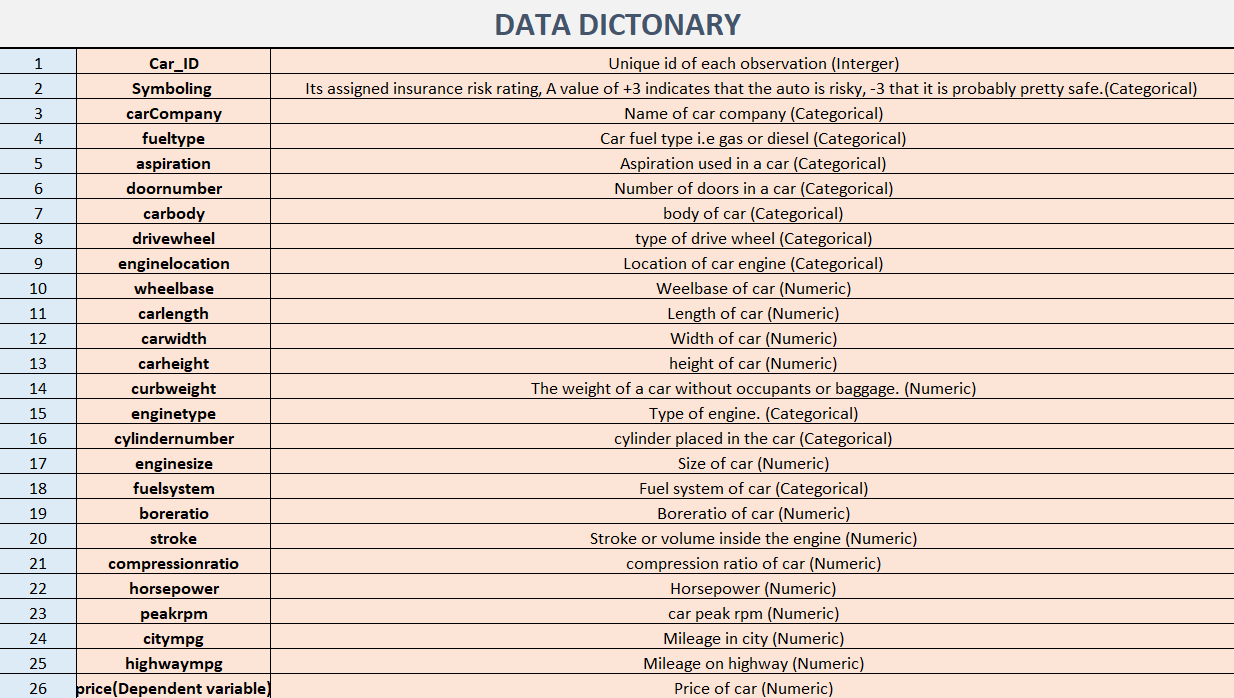

### Objective 

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

#### Understanding your Data 

**1. Read the dataset into a dataframe and store it in the variable `df`.**

In [53]:
df = pd.read_csv("CarPrice_Assignment.csv")

**2. Display the first 10 rows of the dataset.**

In [3]:
print(df.head(10))

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          f

**3. Recall the concept of uninformative features. Identify and write (as a comment) any attributes from the dataset that, in your opinion, should have no effect on the price of a car. This is an open-ended question.**

In [4]:
#   Car_ID: It is merely an unique identifier, it has no effect on price.
#   doornumber: The number of doors does not necessarily determine the price of a car.
#   symboling: Primarily for insurance risk classification, it doesn't have much bearing on car price.

#### Data Cleaning and Exploratory Data Analysis 

**4a. Check for missing values in the dataset.** 

In [54]:
missing = df.isnull().sum()

In [6]:
grader.check("q4a")

q4a results: All test cases passed!

**4b. Drop the attributes '*CarName*', '*fuelsystem*' and '*cylindernumber*'.**

In [55]:
df = df.drop(columns=['CarName', 'fuelsystem', 'cylindernumber'])

In [8]:
grader.check("q4b")

q4b results: All test cases passed!

**4c. Now that you are well versed in data cleaning, clean the data to make predictions more accurate.**

<li>You need to deal with missing data. You are not allowed simply drop all rows with missing data.</li>
<li>Filter out (drop) missing values the dependent variable column. </li>
<li>For the remaining columns, come up with an approrpiate strategy to deal with missing values.</li> 

In [56]:
df = df[df['price'].notnull()]

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_columns:
    if df[col].isnull().sum() > 0:  #
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


**5. Provide descriptive statistics for numerical attributes (using a single pandas function) for the dataset.**

In [10]:
numerical_stats = df.describe()
print(numerical_stats)

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

#### Univariate Analysis 

**6a. Plot a histogram for the target (dependent) variable column to understand the distribution of data** 

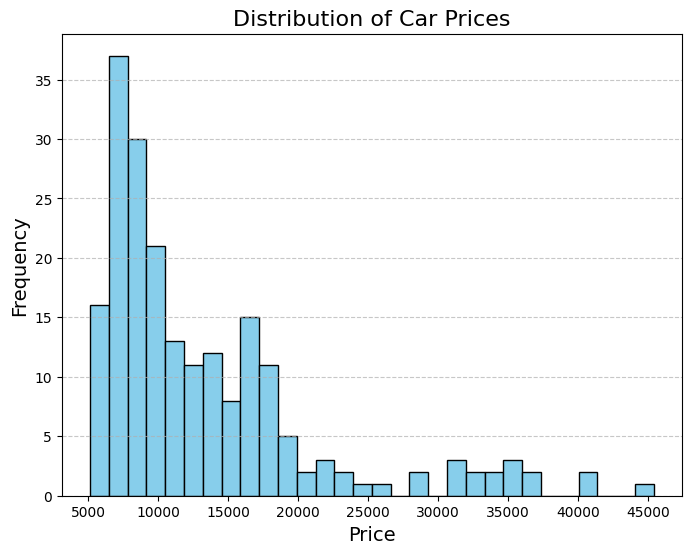

In [57]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**6b. Plot a bar graph for the `enginelocation` attribute to undertstand the distribution of data.**

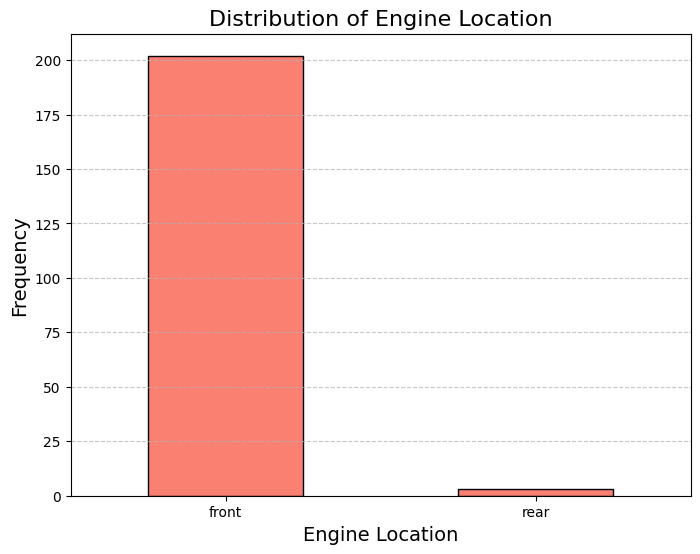

In [58]:
enginelocation_counts = df['enginelocation'].value_counts()
plt.figure(figsize=(8, 6))
enginelocation_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Engine Location', fontsize=16)
plt.xlabel('Engine Location', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**6c. Identify a problem with the `enginelocation` column. Correct this to prepare your data before modelling it.**

In [13]:
#   The data is severly unbalanced when it comes to the attribute 'enginelocation'. It contains two values, one of which is 67 times larger than the other. Hence this
#   introduces a large bias.

#### Bivariate Analysis 

**7a. Plot a scatter plot between the two attributes `price` and `enginesize`.** 

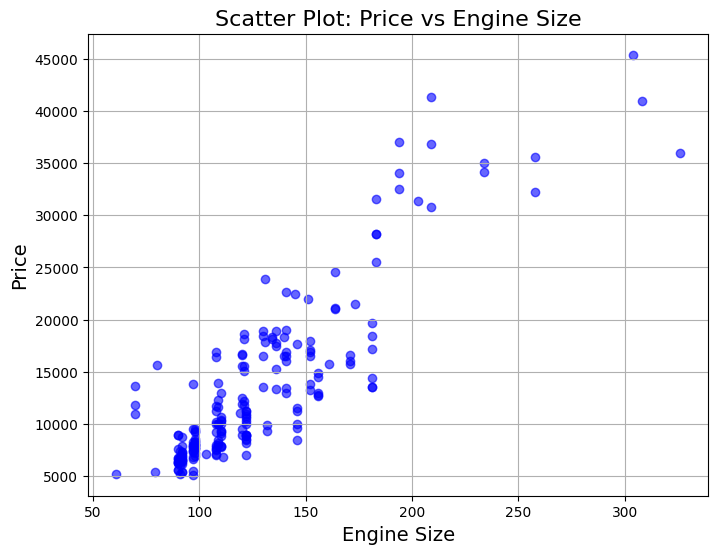

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(df['enginesize'], df['price'], color='blue', alpha=0.6)
plt.title('Scatter Plot: Price vs Engine Size', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

**7b. Comment on the correlation observed between the two.** 

In [15]:
#   We can see a moderate-strong linear relationship between Engine Size and Price, as there is a clear positive trend between the two attributes, however, the points are
#   slightly spread out.

#### Data Preparation 

**8. Identify and perform one-hot encoding on necessary categorical attributes.** 

In [60]:
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = df.astype(int)

In [17]:
grader.check("q8")

q8 results: All test cases passed!

**9. Feature scaling is an important step taken prior to passing data to machine learning models, in order to ensure the features are within the same scale. Otherwise, some features may dominate over others. In this question, you are required to perform normalization on the following columns of the dataframe:** 

- `wheelbase` 
- `carlength` 
- `carwidth` 
- `carheight` 
- `carweight` 
- `enginesize` 
- `horsepower` 
- `peakrpm` 

In [61]:
columns_to_normalize = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm']
for column in columns_to_normalize:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)

In [19]:
grader.check("q9")

q9 results: All test cases passed!

**10a. Display a correlation heatmap for selected numerical columns of the dataframe now.** 


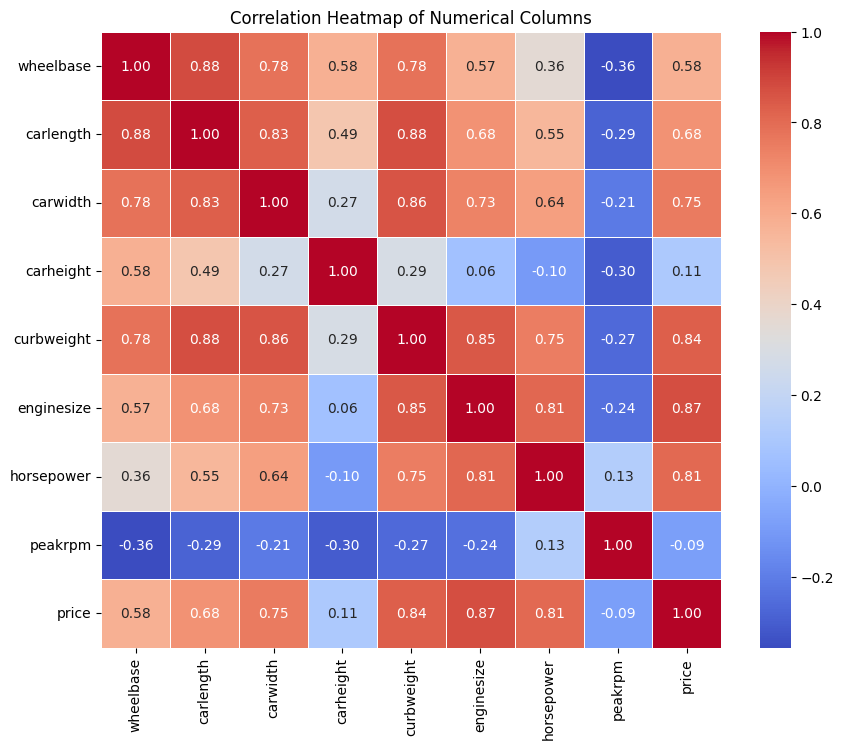

In [62]:
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
                     'enginesize', 'horsepower', 'peakrpm', 'price']

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

**10b. Identify any features that do not have a direct linear correlation with the price of a car.**

In [21]:
# Carheight and PeakRPM

#### Data Splitting 

**11a. Dataset splitting. Create a 75-25 train-test split to train and evaluate your model. Store the data in `train_df` and `test_df` respectively.** 

In [64]:
np.random.seed(42)

shuffled_df = df.sample(frac=1, random_state=42)
split_index = int(0.75 * len(shuffled_df))
train_df = shuffled_df[:split_index]
test_df = shuffled_df[split_index:]

In [23]:
grader.check("q11a")

q11a results: All test cases passed!

**11b. Feature selection. Select features for input and for predicition, store these attributes in `train_x` & `train_y`, and `test_x` & `test_y` variables respectively for each set.** 

In [65]:
columns_to_exclude = ['price', 'symboling', 'car_ID']

train_x = train_df.drop(columns=columns_to_exclude)
train_y = train_df['price']
test_x = test_df.drop(columns=columns_to_exclude)
test_y = test_df['price']

In [25]:
grader.check("q11b")

q11b results: All test cases passed!

#### Machine Learning 

**12. Use Statsmodels to train a multiple linear regression model on the data to predict the price of a car. We will be using Ordinary Least Squares. Print out the summary of your model.**

*Note: Do not forget to add a constant bias variable.* 

In [67]:
train_x_with_const = sm.add_constant(train_x)
model = sm.OLS(train_y, train_x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     40.81
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           9.02e-50
Time:                        20:51:13   Log-Likelihood:                -1402.5
No. Observations:                 153   AIC:                             2863.
Df Residuals:                     124   BIC:                             2951.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -598.3221    

**13. Test this model on your test set to obtain a list of predictions.** 

In [68]:
test_x_with_const = sm.add_constant(test_x)
predictions = model.predict(test_x_with_const)

**14. Comment on the statistical significance of your variables in predicting the price of a car, from your given dataset. Comment on any five.** 

In [28]:
#   Statistical significance is assessed using the p-value from the regression output. Variables with a p-value less than 0.05 are typically considered significant
#   predictors.

#   wheelbase: (0.021) It is statistically significant, suggesting that an increase in the wheelbase strongly correlates with an increase in car price. With its high
#   coeffecient, we can see that it has a substantial impact.

#   enginesize: (0.001) It is highly statistically significant, showing that an increase in the size of our engine strongly correlates with an increase in car price.
#   With its large coeffecient, we can see that it has a very substantial impact.

#   fueltype_gas: (0.985) It is not statistically significant, suggesting that the fuel type of our vehicle doesn't cause much difference in car price. With its high
#   coeffecient, we can see that it has a substantial impact.

#   compressionratio: (0.826) It is not statistically significant, suggesting that the compresion ratio of our vehicle doesn't cause much difference in car price. With its
#   low coeffecient, we can see that it has a very low impact.

#   curbweight: (0.04) It is statistically significant, suggesting that an increase in the curbweight strongly correlates with an increase in car price. With its high
#   coeffecient, we can see that it has a substantial impact.

**15. Plot a graph of your 3 most significant explanatory variables on the x axis and the predicted variable `price` on the y axis**

Note: You are expected to plot all three explanatory variables on the same graph. You can use any EDA technique as long as a trend between the variables is depicted (if any).

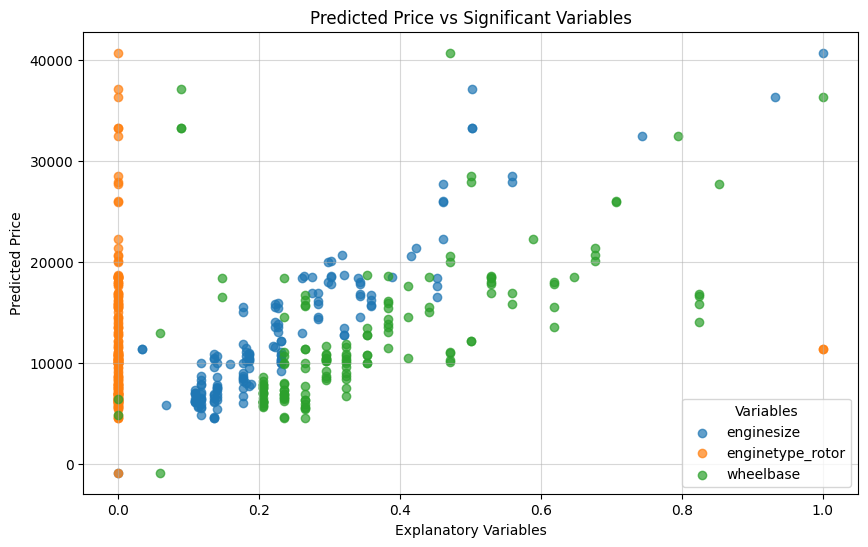

In [69]:
train_x_with_const = sm.add_constant(train_x)
predicted_price = model.predict(train_x_with_const)

significant_vars = ["enginesize", "enginetype_rotor", "wheelbase"]

plt.figure(figsize=(10, 6))
for var in significant_vars:
    plt.scatter(train_x[var], predicted_price, label=var, alpha=0.7)

plt.title("Predicted Price vs Significant Variables")
plt.xlabel("Explanatory Variables")
plt.ylabel("Predicted Price")
plt.legend(title="Variables")
plt.grid(alpha=0.5)
plt.show()

**16a. Implement the function `calculateR2score` that takes as an input**
- **The output column in `test_df` and**
- **The *predicted* output column of the `test_df`.**

**The output of this function should be the R^2 score of the prediction. You must calculate this from scratch.** 

In [70]:
def calculateR2score(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    mean_actual = np.mean(actual)
    
    ss_res = np.sum((actual - predicted) ** 2)
    ss_tot = np.sum((actual - mean_actual) ** 2)
    r2_score = 1 - (ss_res / ss_tot)
    
    return r2_score


In [71]:
grader.check("q16a")

q16a results: All test cases passed!

**16b. Use the function implemented in (a) to obtain the R^2 score for your model implemented using your model.** 

In [72]:
test_x_with_const = sm.add_constant(test_x)
predicted_test_y = model.predict(test_x_with_const)
r2_score = calculateR2score(test_y, predicted_test_y)

print(f"R^2 Score on Test Set: {r2_score}")

R^2 Score on Test Set: 0.8305569071041594


**17a. The following formula to obtain the optimal parameters in a linear model was discussed in class:**

$\theta = (X^{T}X)^{-1}X^{T}y$

**Implement the function `optimal_params` that takes as an input**
- **The input features as `X` and**
- **The output column (prices) as `y`.**

**The output of this function should be the optimal weights. You must calculate this from scratch.** 

In [73]:
def optimal_params(X, y):
    X = np.array(X)
    y = np.array(y)
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta


In [34]:
grader.check("q17a")

q17a results: All test cases passed!

**17b. Use the function from 17(a) to obtain the parameters according to the OLS model. Then use these to obtain a list of predictions for your test dataset.** 

In [74]:
train_x_with_const = sm.add_constant(train_x)
test_x_with_const = sm.add_constant(test_x)

theta = optimal_params(train_x_with_const, train_y)
test_predictions = test_x_with_const @ theta

print(f"Predictions for the test dataset:\n{test_predictions}")

Predictions for the test dataset:
83     16150.159963
181    19717.639119
186    10421.479913
89      6652.101297
8      17761.226472
13     18161.302754
59      9963.316934
176    11166.992247
131    11111.837835
17     30708.633743
72     23844.304904
180    21812.618306
134    16150.933860
171    15644.560166
198    19216.090319
63     12374.172561
54      5657.612387
107    13267.002866
50      3481.796793
201    22371.058477
169    14911.300852
58     14722.002230
48     32466.399348
88     11176.927772
21      5992.562094
57     11417.492617
160     8621.044375
197    17593.427560
129    34303.490383
37     10196.254777
157     5921.856031
193    10121.726107
1      12922.777514
52      5700.986149
149     8727.415004
130    11021.808286
151     6262.416588
103    17789.882053
99     10793.809780
116    18029.185796
87     11113.696146
74     31236.095209
121     6254.994353
204    20323.448812
20      6671.900442
188    11300.012092
71     27613.017358
106    18370.578802
14    

**17c. Compare the results obtained using the OLS model to those generated by Statsmodel (as a comment) by comparing the R^2 score (of the test data) on both. Explain any difference between the optimal and the OLS model.** 

In [75]:
test_x_with_const = sm.add_constant(test_x)
theta_manual = optimal_params(train_x_with_const, train_y)
predictions_manual = test_x_with_const @ theta_manual

r2_manual = calculateR2score(test_y, predictions_manual)
print(f"R² score from manual OLS model: {r2_manual}")

model_stats = sm.OLS(train_y, train_x_with_const).fit()
predictions_stats = model_stats.predict(test_x_with_const)

r2_stats = model_stats.rsquared
print(f"R² score from Statsmodels OLS model: {r2_stats}")

R² score from manual OLS model: 0.8305569071041953
R² score from Statsmodels OLS model: 0.9021150731032188


**18. Use sklearn to perform Ridge regression on the data. Evaluate Ridge regression for a range of $\alpha$ values to find the optimal $\alpha$. Report the RMSE of the model for the optimal $\alpha$ on the test set.**

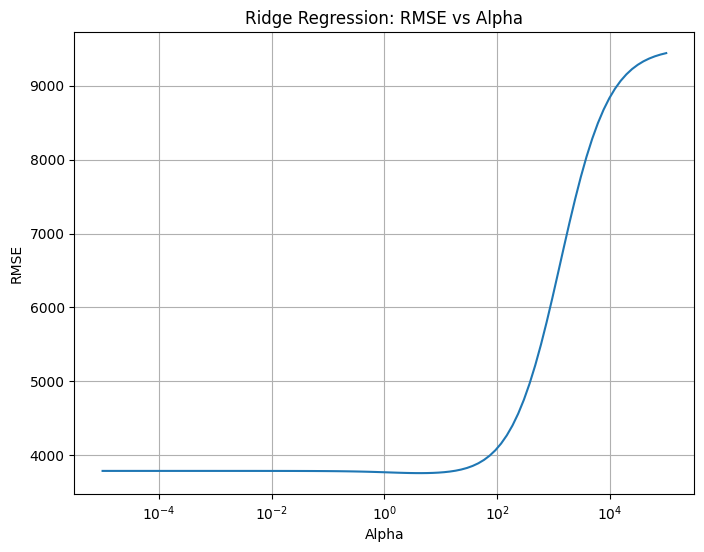

The optimal alpha is: 4.534878508128582
RMSE for the optimal alpha on the test set: 3756.8600653435524


In [76]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)


alphas = np.logspace(-5, 5, 100)
rmse_values = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_x_scaled, train_y)
    test_predictions = ridge_model.predict(test_x_scaled)
    rmse = np.sqrt(mean_squared_error(test_y, test_predictions))
    rmse_values.append(rmse)

plt.figure(figsize=(8, 6))
plt.plot(alphas, rmse_values, label='RMSE vs alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Ridge Regression: RMSE vs Alpha')
plt.grid(True)
plt.show()

optimal_alpha = alphas[np.argmin(rmse_values)]
print(f"The optimal alpha is: {optimal_alpha}")
optimal_ridge_model = Ridge(alpha=optimal_alpha)
optimal_ridge_model.fit(train_x_scaled, train_y)
test_predictions_optimal = optimal_ridge_model.predict(test_x_scaled)
optimal_rmse = np.sqrt(mean_squared_error(test_y, test_predictions_optimal))
print(f"RMSE for the optimal alpha on the test set: {optimal_rmse}")


**19. As the value of $\alpha$ increases, you will notice the the weights of the model parameters will start to change. Plot the values of all the weights against $\log(\alpha$) on a single figure. Describe what you see.**

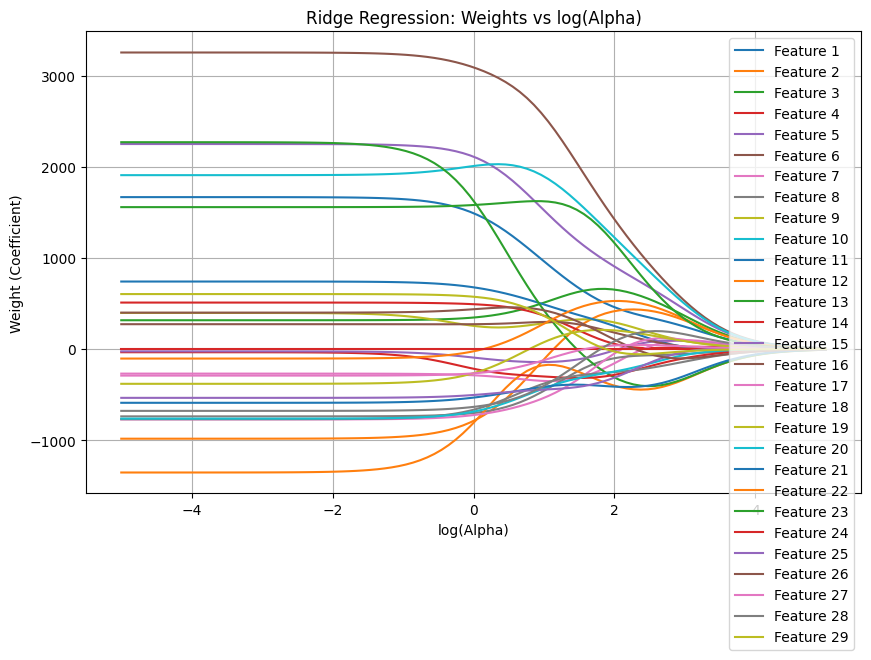

In [77]:
alphas = np.logspace(-5, 5, 100)

coefficients = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_x_scaled, train_y)
    coefficients.append(ridge_model.coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(np.log10(alphas), coefficients[:, i], label=f'Feature {i+1}')
plt.xlabel('log(Alpha)')
plt.ylabel('Weight (Coefficient)')
plt.title('Ridge Regression: Weights vs log(Alpha)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
#   We can see the weight coefficients of each attribute converge to zero as the value of Alpha increases.

**20. Next, you are required to train a decision tree regressor on the same data. This is to evaluate and ultimately select the best model for the given problem. You are required to use sklearn for this part. Find the RMSE of the test data on the new predictions generated by your decision tree model. Compare this with your linear model at three values of max_depths: 3, 5, and 10.** 

In [78]:
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

max_depth_values = [3, 5, 10]
decision_tree_rmse = []

for depth in max_depth_values:
    dt_model = DecisionTreeRegressor(max_depth=depth)
    dt_model.fit(train_x_scaled, train_y)
    test_predictions = dt_model.predict(test_x_scaled)
    rmse = calculate_rmse(test_y, test_predictions)
    decision_tree_rmse.append(rmse)
    print(f"Decision Tree with max_depth={depth} - RMSE: {rmse}")



ridge_model = Ridge(alpha=1)
ridge_model.fit(train_x_scaled, train_y)
ridge_predictions = ridge_model.predict(test_x_scaled)
ridge_rmse = calculate_rmse(test_y, ridge_predictions)
print(f"Ridge Regression - RMSE: {ridge_rmse}")


Decision Tree with max_depth=3 - RMSE: 3382.933530822366
Decision Tree with max_depth=5 - RMSE: 3418.7254652652405
Decision Tree with max_depth=10 - RMSE: 3053.8980993038253
Ridge Regression - RMSE: 3768.595706323456


In [41]:
#   We can see that with increasing depth of our Decision Tree, our RMSE decreases. Overall, however, the RMSE calculated from Linear regression seems to underperform when
#   compared to Decision Tree in terms of RMSE. THe RMSE for Linear regression comes out as higher than the RMSEs calculated forthe decision trees at all depths chosen.

**21. A sklearn random forest model has variable number of estimators and maximum depth of trees. Selecting suitable ranges for both parameters, plot a 3D plot of the RMSE against both of these parameters. What do you see? For the optimal values of these parameters report the RMSE on the test data.**

*Note: To learn more about how to use the random forest model in sklearn, please refer to the following link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html*

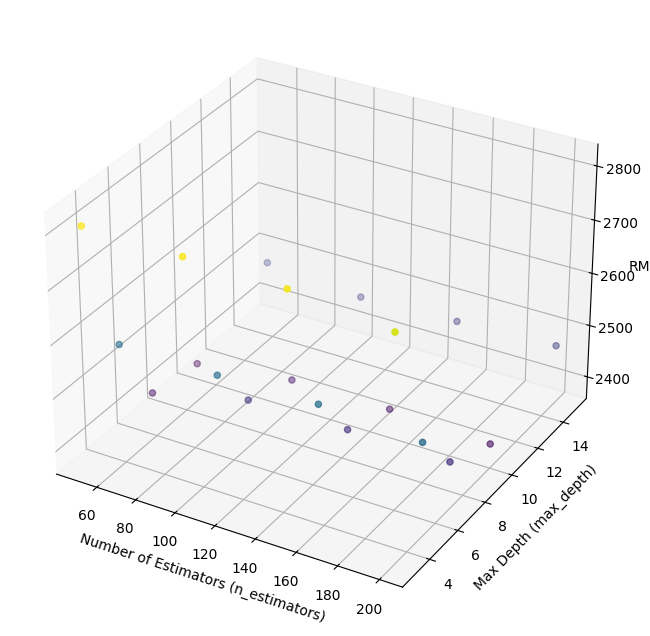

Optimal parameters: n_estimators = 50, max_depth = 10
RMSE with optimal parameters: 2388.0119657146392


In [79]:
n_estimators_range = [50, 100, 150, 200]
max_depth_range = [3, 5, 7, 10, 15]

rmse_values = []

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(train_x_scaled, train_y)
        test_predictions = rf_model.predict(test_x_scaled)
        rmse = calculate_rmse(test_y, test_predictions)
        rmse_values.append((n_estimators, max_depth, rmse))

n_estimators_values, max_depth_values, rmse_values_only = zip(*rmse_values)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(n_estimators_values, max_depth_values, rmse_values_only, c=rmse_values_only, cmap='viridis')
ax.set_xlabel('Number of Estimators (n_estimators)')
ax.set_ylabel('Max Depth (max_depth)')
ax.set_zlabel('RMSE')
plt.show()

optimal_idx = np.argmin(rmse_values_only)
optimal_n_estimators = n_estimators_values[optimal_idx]
optimal_max_depth = max_depth_values[optimal_idx]
optimal_rmse = rmse_values_only[optimal_idx]
print(f"Optimal parameters: n_estimators = {optimal_n_estimators}, max_depth = {optimal_max_depth}")
print(f"RMSE with optimal parameters: {optimal_rmse}")


In [ ]:
# The graph shows us that the lower values of RMSE occur in regions where the Number of Estimators is lower AND the Max depth is higher.

##### Open-ended Research Question

**22a. A large part of machine learning involves using prior domain knowledge or conducting research/exploration to find a model that suits your dataset. This could also involve adjusting hyperparameters, selecting combinations of features, performing feature engineering, or using a new approach altogether.**

Your final task is to find a model that has the lowest RMSE across all the following train-test split ratios (on the provided car dataset).

- 90% Train, 10% Test
- 70% Train, 30% Test
- 50% Train, 50% Test

For this part, you can only use the following five model types: OLS (Ordinary Least Squares), Ridge, Lasso, Decision Tree, or a Random Forest model. Any implementation of the above may be used. You are free to tune the hyperparameters or perform feature engineering.

For output purposes, fit suitable instances of any 2 of the model types on your training data and print the RMSE (of the test data) across the four train-test splits separately. 

In [80]:
split_ratios = [(0.9, 0.1), (0.75, 0.25), (0.7, 0.3), (0.5, 0.5)]

results = {model: [] for model in ["OLS", "Ridge", "Lasso", "Decision Tree", "Random Forest"]}

ridge_alpha = 10
lasso_alpha = 0.1
dt_max_depth = 5
rf_params = {"n_estimators": 100, "max_depth": 10, "random_state": 42}

for train_size, test_size in split_ratios:
    train_x_split, test_x_split, train_y_split, test_y_split = train_test_split(
        train_x_scaled, train_y, train_size=train_size, test_size=test_size, random_state=42
    )

    # OLS
    ols_model = LinearRegression()
    ols_model.fit(train_x_split, train_y_split)
    ols_predictions = ols_model.predict(test_x_split)
    results["OLS"].append(calculate_rmse(test_y_split, ols_predictions))

    # Ridge Regression
    ridge_model = Ridge(alpha=ridge_alpha)
    ridge_model.fit(train_x_split, train_y_split)
    ridge_predictions = ridge_model.predict(test_x_split)
    results["Ridge"].append(calculate_rmse(test_y_split, ridge_predictions))

    # Lasso Regression
    lasso_model = Lasso(alpha=lasso_alpha)
    lasso_model.fit(train_x_split, train_y_split)
    lasso_predictions = lasso_model.predict(test_x_split)
    results["Lasso"].append(calculate_rmse(test_y_split, lasso_predictions))

    # Decision Tree
    dt_model = DecisionTreeRegressor(max_depth=dt_max_depth, random_state=42)
    dt_model.fit(train_x_split, train_y_split)
    dt_predictions = dt_model.predict(test_x_split)
    results["Decision Tree"].append(calculate_rmse(test_y_split, dt_predictions))

    # Random Forest
    rf_model = RandomForestRegressor(**rf_params)
    rf_model.fit(train_x_split, train_y_split)
    rf_predictions = rf_model.predict(test_x_split)
    results["Random Forest"].append(calculate_rmse(test_y_split, rf_predictions))

for model, rmses in results.items():
    print(f"\n{model} RMSE results:")
    for idx, (train_size, test_size) in enumerate(split_ratios):
        print(f"Train-Test Split {train_size*100:.0f}% - {test_size*100:.0f}%: RMSE = {rmses[idx]:.4f}")



OLS RMSE results:
Train-Test Split 90% - 10%: RMSE = 2578.3969
Train-Test Split 75% - 25%: RMSE = 2411.9107
Train-Test Split 70% - 30%: RMSE = 2722.2248
Train-Test Split 50% - 50%: RMSE = 4406.9784

Ridge RMSE results:
Train-Test Split 90% - 10%: RMSE = 2471.7431
Train-Test Split 75% - 25%: RMSE = 2191.6634
Train-Test Split 70% - 30%: RMSE = 2367.7535
Train-Test Split 50% - 50%: RMSE = 3500.8490

Lasso RMSE results:
Train-Test Split 90% - 10%: RMSE = 2578.4065
Train-Test Split 75% - 25%: RMSE = 2410.9227
Train-Test Split 70% - 30%: RMSE = 2720.9045
Train-Test Split 50% - 50%: RMSE = 4401.1083

Decision Tree RMSE results:
Train-Test Split 90% - 10%: RMSE = 2268.4953
Train-Test Split 75% - 25%: RMSE = 2891.1002
Train-Test Split 70% - 30%: RMSE = 2995.1909
Train-Test Split 50% - 50%: RMSE = 3144.1798

Random Forest RMSE results:
Train-Test Split 90% - 10%: RMSE = 1716.9255
Train-Test Split 75% - 25%: RMSE = 2363.1122
Train-Test Split 70% - 30%: RMSE = 2216.4075
Train-Test Split 50% - 50%

In [45]:
#   From our results we can see that the Random Forest performed best in terms of RMSE, giving us the lowest value at 90% - 10% split ratio, so we will be using this model
#   and split ratio for our final question.

**22b. Lastly, you are required to perform 5 fold cross validation on your finalized best-performing model, in order to ensure that your model has not overfitted to your training data. Comment on results across all splits.** 

In [82]:
train_x_90, test_x_10, train_y_90, test_y_10 = train_test_split(
    train_x_scaled, train_y, train_size=0.9, test_size=0.1, random_state=42
)

train_x_90 = np.array(train_x_90)
train_y_90 = np.array(train_y_90)

rf_best_model = RandomForestRegressor(**rf_params)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_rmse = []

for train_idx, val_idx in kf.split(train_x_90):
    x_train_fold, x_val_fold = train_x_90[train_idx], train_x_90[val_idx]
    y_train_fold, y_val_fold = train_y_90[train_idx], train_y_90[val_idx]
    rf_best_model.fit(x_train_fold, y_train_fold)
    y_val_pred = rf_best_model.predict(x_val_fold)
    fold_rmse.append(calculate_rmse(y_val_fold, y_val_pred))

print("5-Fold Cross-Validation RMSE Scores:", fold_rmse)
print("Mean RMSE across folds:", np.mean(fold_rmse))
print("Standard Deviation of RMSE across folds:", np.std(fold_rmse))

5-Fold Cross-Validation RMSE Scores: [3360.1212124525164, 2055.5423773474245, 1938.1389078659076, 3462.601021496202, 1633.1066861744862]
Mean RMSE across folds: 2489.902041067307
Standard Deviation of RMSE across folds: 765.5891673171403


In [ ]:
#   The RMSE we see for the 5 folds are within the values of 1633 and 3463. The mean RMSE comes out to be 2489.9. The lowest RMSE comes out in Fold 5 as the value of
#   1633. Given the very high values of RMSE we can say that the modle is not overfitted as it is giving a relatively equal value of RMSE for the training and testing portions
#   and the Fold split technique is giving a lower RMSE than regular training and testing.